### Overview:

This analysis explores the compensation amoung various demograhics. This dataset tells the story of whether their equality or any disparties due to race, gender and marital status. While exploring this data it poses the questions of are men making more than women, are black women being compensated fairly like a white male, are married women making more than single women, what drives this information, are there other factors needed to determine if this analysis is accurate and what is this dataset telling us? 

### Compensation Equality

`#How does salaries vary across demographics (race, age, martial status, departments and sex)?`

`#Are there any salary discrimination among genders that work in the same dept?`


### Part 1: Load Data & Import Data

In [184]:
#Compensation Equality
#How does salaries vary across demographics (race, age, martial status, departments and sex)?
#Are there any salary discrimination among genders that work in the same dept?

In [185]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# import data
data = pd.read_csv("../data/HRDataset.csv")

In [187]:
data.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Part 2: Questions   

#How does salaries vary across demographics (race, age, martial status, departments and sex)?

#Are there any salary discrimination among genders that work in the same dept?

`Sex` to identify if the employee's gender

`RaceDesc` to identify the employee's race

`Salary` to identify the pay each employee is receiving

`Marital Status` to identify whether an employee's martial status

`Department` analyzes and measures the trends based off demographics


In [188]:
#The dataset that will be analyzing compensaton with demographics. 

Compensation = data[["Sex", "RaceDesc", "Salary", "Department", "MaritalDesc", "DOB"]]
print(Compensation)

    Sex RaceDesc  Salary         Department MaritalDesc       DOB
0    M     White   62506  Production             Single  07/10/83
1    M     White  104437              IT/IS     Married  05/05/75
2     F    White   64955  Production            Married  09/19/88
3     F    White   64991  Production            Married  09/27/88
4     F    White   50825  Production           Divorced  09/08/89
..   ..      ...     ...                ...         ...       ...
306  M     White   65893  Production             Single  05/11/85
307   F    Asian   48513  Production             Single  05/04/82
308   F    White  220450              IT/IS      Single  08/30/79
309   F    White   89292              IT/IS      Single  02/24/79
310   F    Asian   45046  Production            Widowed  08/17/78

[311 rows x 6 columns]


In [189]:
#Identify null values
Compensation.isnull().sum()

Sex            0
RaceDesc       0
Salary         0
Department     0
MaritalDesc    0
DOB            0
dtype: int64

In [190]:
#Calculated the mean salary
mean_salary = Compensation ['Salary'].mean().round(2)

### Part 3: EDA & Visualizations

In [191]:
#Evaluate Compensation by Race

Compensation.groupby('RaceDesc').agg({'Salary' : ['mean', 'max', 'count', 'min']})

Salary                     
                                          mean     max count    min
RaceDesc                                                           
American Indian or Alaska Native  65806.000000   70545     3  60724
Asian                             68521.206897  107226    29  45046
Black or African American         74431.025000  178000    80  46654
Hispanic                          83667.000000   83667     1  83667
Two or more races                 59998.181818   71707    11  47961
White                             67287.545455  250000   187  45069

In [192]:
#Evaluate Compensation by Gender

Compensation.groupby('Sex').agg({'Salary' : ['mean', 'max', 'count', 'min']})

Salary                     
             mean     max count    min
Sex                                   
F    67786.727273  250000   176  45046
M    70629.400000  178000   135  45115

In [193]:
#Evaluate Compensation by Marital Status

Compensation.groupby('MaritalDesc').agg({'Salary' : ['mean', 'max', 'count', 'sum']})

Salary                       
                     mean     max count      sum
MaritalDesc                                     
Divorced     64427.333333  148999    30  1932820
Married      69827.717742  250000   124  8658637
Separated    62934.333333   74417    12   755212
Single       70052.576642  220450   137  9597203
Widowed      65195.125000  107226     8   521561

In [194]:
#Evaluate Compensation by Department

Compensation.groupby('Department').agg({'Salary' : ['mean', 'max', 'count', 'sum']})

Salary                        
                               mean     max count       sum
Department                                                 
Admin Offices          71791.888889  106367     9    646127
Executive Office      250000.000000  250000     1    250000
IT/IS                  97064.640000  220450    50   4853232
Production             59953.545455  170500   209  12530291
Sales                  69061.258065  180000    31   2140899
Software Engineering   94989.454545  108987    11   1044884

In [195]:
#Calculating the average salary in each department by gender

salary_summary = data.groupby(['Department','Sex'])['Salary'].agg(['count','mean','median'])
print(salary_summary)

                          count           mean    median
Department           Sex                                
Admin Offices        F        6   70926.333333   59000.0
                     M        3   73523.000000   64520.0
Executive Office     F        1  250000.000000  250000.0
IT/IS                F       22   94593.000000   91718.5
                     M       28   99006.642857   92328.5
Production           F      126   59620.420635   60536.5
                     M       83   60459.253012   58523.0
Sales                F       15   72016.666667   63051.0
                     M       16   66290.562500   67029.5
Software Engineering F        6   96906.166667   97470.0
                     M        5   92689.400000   92989.0


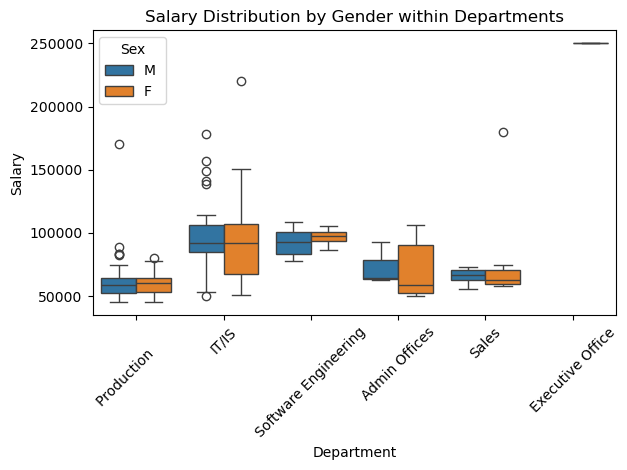

In [196]:
plt.Figure(figsize=(10,6))
sns.boxplot(x='Department', y='Salary', hue='Sex', data=Compensation)
plt.title('Salary Distribution by Gender within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

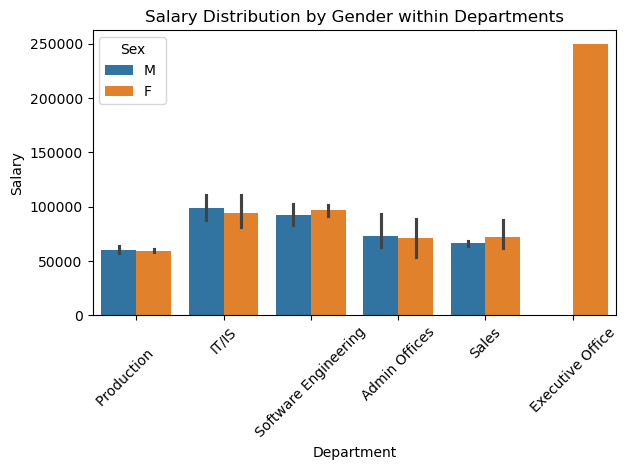

In [197]:
#Bar Plot
avg_salary = data.groupby(['Department', 'Sex'])['Salary'].mean()

plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary', hue='Sex', data=Compensation)
plt.title('Salary Distribution by Gender within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

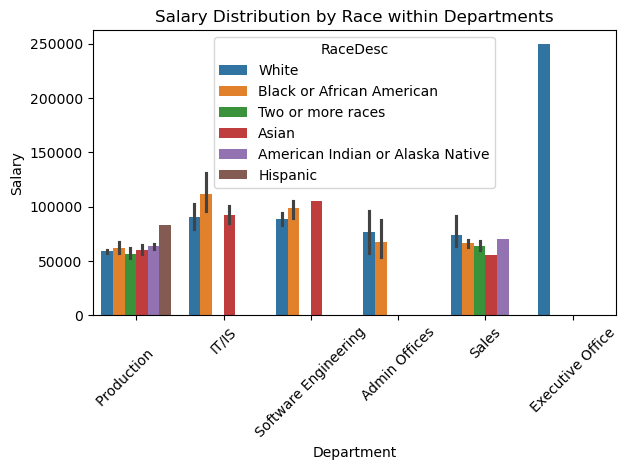

In [198]:
#Bar Plot
avg_salary = data.groupby(['Department', 'RaceDesc'])['Salary'].mean()

plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary', hue='RaceDesc', data=Compensation)
plt.title('Salary Distribution by Race within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

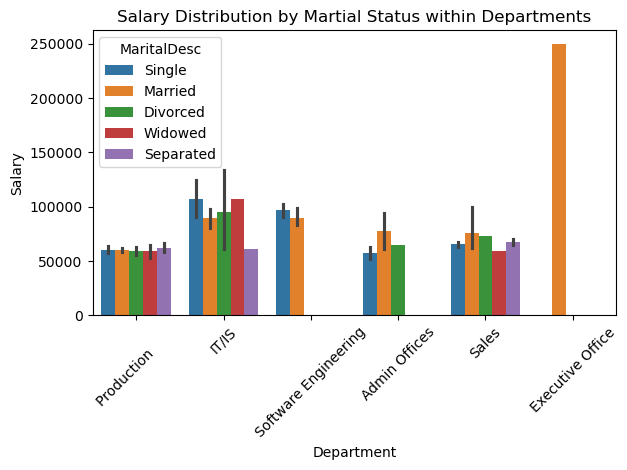

In [199]:
#Bar Plot
avg_salary = data.groupby(['Department', 'MaritalDesc'])['Salary'].mean()

plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary', hue='MaritalDesc', data=Compensation)
plt.title('Salary Distribution by Martial Status within Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [200]:
avg_salary = data.groupby(['Department', 'Sex'])['Salary'].mean()
print(avg_salary)

Department            Sex
Admin Offices         F       70926.333333
                      M       73523.000000
Executive Office      F      250000.000000
IT/IS                 F       94593.000000
                      M       99006.642857
Production            F       59620.420635
                      M       60459.253012
Sales                 F       72016.666667
                      M       66290.562500
Software Engineering  F       96906.166667
                      M       92689.400000
Name: Salary, dtype: float64


In [201]:
#avg_salary.columns = ['Average_Salary']

In [202]:
#Calculating the average salary by Gender, Race, Marital Status within each department

avg_salary = data.groupby(['Department', 'Sex', 'RaceDesc', 'MaritalDesc']).agg({'Salary' : ['mean']}).round(2)
avg_salary

Salary
                                                                     mean
Department           Sex RaceDesc                  MaritalDesc           
Admin Offices        F   Black or African American Married       68571.75
                         White                     Married       99351.00
                                                   Single        51920.00
                     M   Black or African American Divorced      64520.00
                         White                     Married       93046.00
...                                                                   ...
Software Engineering F   White                     Married       86214.00
                                                   Single        94528.00
                     M   Black or African American Married       83363.00
                                                   Single       104701.50
                         White                     Single        85340.50

[78 rows x 1 columns]

In [203]:
avg_salary.columns = ["Salary_mean"]

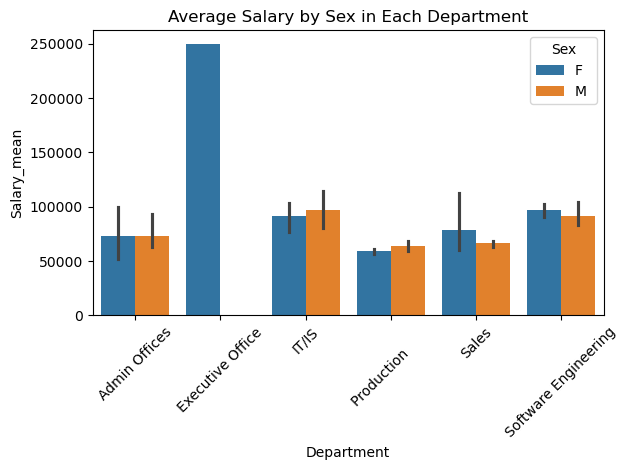

In [204]:
plt.Figure(figsize=(10,6))
sns.barplot(x='Department', y='Salary_mean', hue='Sex', data=avg_salary)
plt.title('Average Salary by Sex in Each Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Part 4: Conclusion

Based off the analysis, there weren't too many disparities with compensation based on race, gender and marital status. Some of findings are:

`Marital Status` In some departments single women are earning more than married women.

`Gender` Some departments women are earning more than men. 

`Race` In some departments blacks make more than other races. 

### Part 5: Next Steps

In the next steps, one can analyze how the employee job satisfaction and retention due is affected by compensation. 